#### Author: Manish Bendale
<b> Topic :</b> Color Transfer Between Images

In [1]:
import numpy as np
import cv2

<b>The algorithm goes like this:</b>

Algorithm Steps Reference: https://ieeexplore.ieee.org/document/946629

1. Step 1: Input a source and a target image. The source image contains the color space that you want your target image to mimic. In the figure at the top of  this page, the sunset image on the left is my source, the middle image is my target, and the image on the right is the color space of the source applied to the target.<br>

2. Step 2: Convert both the source and the target image to the L*a*b* color space. The L*a*b* color space models perceptual uniformity, where a small change in an amount of color value should also produce a relatively equal change in color importance. The L*a*b* color space does a substantially better job mimicking how humans interpret color than the standard RGB color space, and as you’ll see, works very well for color transfer.<br>

3. Step 3: Split the channels for both the source and target.<br>
4. Step 4: Compute the mean and standard deviation of each of the L*a*b* channels for the source and target images.<br>
5. Step 5: Subtract the mean of the L*a*b* channels of the target image from target channels.<br>
6. Step 6: Scale the target channels by the ratio of the standard deviation of the target divided by the standard deviation of the source, multiplied by the target channels.<br>
7. Step 7: Add in the means of the L*a*b* channels for the source.<br>
8. Step 8: Clip any values that fall outside the range [0, 255]. (Note: This step is not part of the original paper. I have added it due to how OpenCV handles color space conversions. If you were to implement this algorithm in a different language/library, you would either have to perform the color space conversion yourself, or understand how the library doing the conversion is working).<br>
9. Step 9: Merge the channels back together.<br>
10. Step 10: Convert back to the RGB color space from the L*a*b* space.

In [2]:
def Mean_std_of_Image(image):
    # compute the mean and standard deviation of each channel
    l, a, b = cv2.split(image)
    LMean, LStd = l.mean(), l.std()
    AMean, ASStd = a.mean(), a.std()
    BMean, BStd = b.mean(), b.std()
    return LMean, LStd, AMean, ASStd, BMean, BStd

def Color_Transfer_Between_Images(source_img, target_img):
    # convert the images from the RGB to L*ab* color space, being
    # sure to utilizing the floating point data type (note: OpenCV
    # expects floats to be 32-bit, so use that instead of 64-bit)
    # OpenCV represents images as multi-dimensional NumPy arrays, 
    # but defaults to the uint8 datatype. 
    # This is fine for most cases, 
    # but when performing the color transfer we could potentially have 
    # negative and decimal values, 
    # thus we need to utilize the floating point data type.
    source = cv2.cvtColor(source_img, cv2.COLOR_BGR2LAB).astype("float32")
    target = cv2.cvtColor(target_img, cv2.COLOR_BGR2LAB).astype("float32")
    
    ## computes the mean and standard deviation of the pixel 
    # intensities for each of the L*, a*, and b* channels
    
    LMean_source, LStd_source, AMean_source, ASStd_source, BMean_source, BStd_source = Mean_std_of_Image(source) 
    LMean_target, LStd_target, AMean_target, ASStd_target, BMean_target, BStd_target = Mean_std_of_Image(target)
    
    # subtract the means from the target image
    (l, a, b) = cv2.split(target)
    l -= LMean_target
    a -= AMean_target
    b -= BMean_target

    # add in the source mean
    l += LMean_source
    a += AMean_source
    b += AMean_source

    # clip the pixel intensities to [0, 255] if they fall outside
    # this range
    l = np.clip(l, 0, 255)
    a = np.clip(a, 0, 255)
    b = np.clip(b, 0, 255)
    
    # merge the channels together and convert back to the RGB color
    # space, being sure to utilize the 8-bit unsigned integer data
    # type
    transfer_color = cv2.merge([l, a, b])
    transfer_color = cv2.cvtColor(transfer_color.astype("uint8"), cv2.COLOR_LAB2BGR)

    # return the color transferred image
    return transfer_color
 

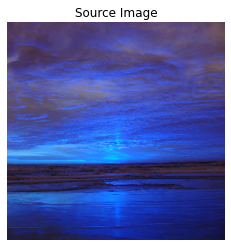

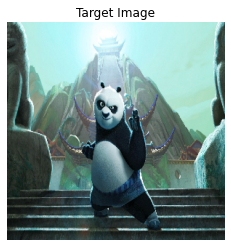

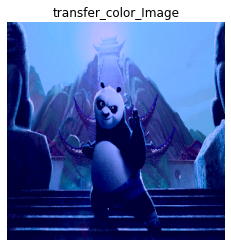

In [4]:
## Example-1
import matplotlib.pyplot as plt

s_img = cv2.imread("ocean_sunset.jpg")
s_img = cv2.resize(s_img, (300,300), interpolation = cv2.INTER_NEAREST)
t_img = cv2.imread("panda.jpeg")
t_img = cv2.resize(t_img, (300,300), interpolation = cv2.INTER_NEAREST)
transfer_color = Color_Transfer_Between_Images(s_img, t_img)
#cv2.imshow("Source Image",s_img)
#cv2.imshow("Target Image",t_img)
#cv2.imshow("transfer_color_Image",transfer_color)

plt.figure()
plt.axis("off")
plt.title("Source Image")
plt.imshow(s_img)

plt.figure()
plt.axis("off")
plt.title("Target Image")
plt.imshow(t_img)

plt.figure()
plt.axis("off")
plt.title("transfer_color_Image")
plt.imshow(transfer_color)

#cv2.waitKey(0)
#cv2.destroyAllWindows()

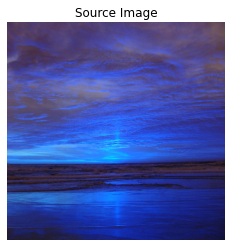

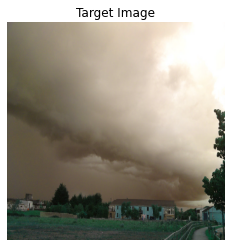

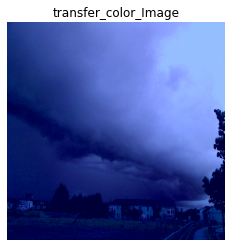

In [6]:
## Example-2

s_img = cv2.imread("ocean_sunset.jpg")
s_img = cv2.resize(s_img, (500,500), interpolation = cv2.INTER_NEAREST)
t_img = cv2.imread("storm.jpg")
t_img = cv2.resize(t_img, (500,500), interpolation = cv2.INTER_NEAREST)
transfer_color = Color_Transfer_Between_Images(s_img, t_img)
'''cv2.imshow("Source Image",s_img)
cv2.imshow("Target Image",t_img)
cv2.imshow("transfer_color_Image",transfer_color)
cv2.waitKey(0)
cv2.destroyAllWindows()'''

plt.figure()
plt.axis("off")
plt.title("Source Image")
plt.imshow(s_img)

plt.figure()
plt.axis("off")
plt.title("Target Image")
plt.imshow(t_img)

plt.figure()
plt.axis("off")
plt.title("transfer_color_Image")
plt.imshow(transfer_color)